<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Enrique Rodriguez Torres.
<br>
<i><b>Asignatura:</b></i> Aprendizaje de Máquinas
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Segundo Parcial.
<br>
<br>
</FONT>
</div>

In [102]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning

# Configura para ignorar las advertencias de ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Punto 1: Usando las 30 primeras muestras del dataset de diabetes,  y las columnas Pregnancies,Glucose de entrada y Outcome de salida

<b></b>
<br>
<i><b>LINK DE DATOS:</b></i> https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Realizar validación cruzada con k =3
<br>

In [104]:
df_biabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

<b></b>
<br>
<i><b>A:</b></i>Crear un modelo de regresión logística con sklearn
Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar accuracy en train y test


Fold 1 - Train Accuracy: 0.65, Test Accuracy: 0.90
Fold 2 - Train Accuracy: 0.80, Test Accuracy: 0.50
Fold 3 - Train Accuracy: 0.65, Test Accuracy: 0.60


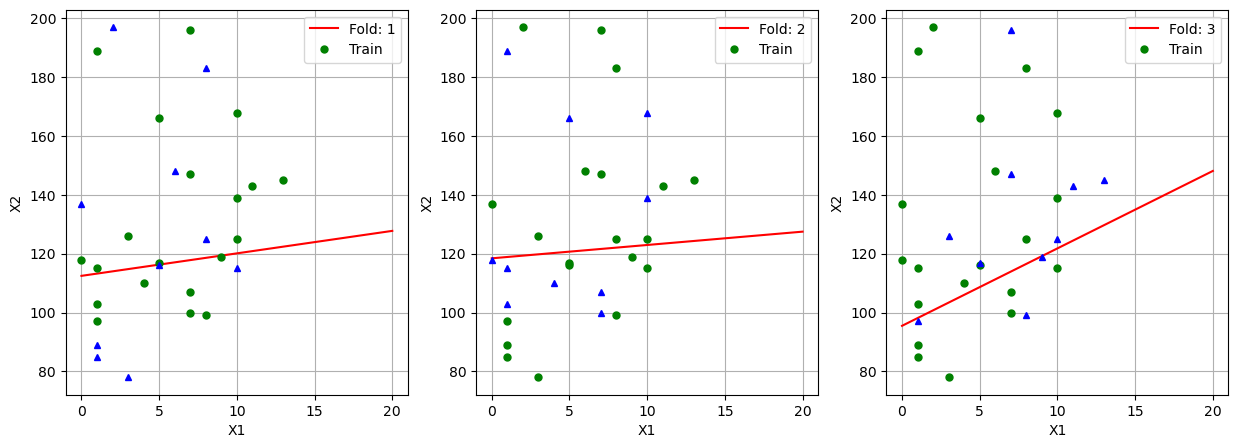

Promedio Train Accuracy: 0.70
Promedio Test Accuracy: 0.67


In [105]:

df_biabetes_30 = df_biabetes.head(30)
X = df_biabetes_30[['Pregnancies', 'Glucose']].values
Y = df_biabetes_30['Outcome'].values

k = 3
kf = KFold(n_splits=k)

logisticRegr = LogisticRegression()

train_accs = []
test_accs = []
coef = []
intercept = []


plt.figure(figsize=(15, 5))

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    logisticRegr.fit(X_train, y_train)

    train_predictions = logisticRegr.predict(X_train)
    test_predictions = logisticRegr.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    w1 = logisticRegr.coef_[0][0]
    w2 = logisticRegr.coef_[0][1]
    b = logisticRegr.intercept_[0]

    x1 = np.linspace(0, 20, 100)
    x2 = -(w1 / w2) * x1 - (b / w2)

    plt.subplot(1, k, fold + 1)
    plt.plot(x1, x2, 'r-', label=f'Fold {fold + 1}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid()

    for i in range(len(X_train)):
        x_i = X_train[i]
        plt.plot(x_i[0], x_i[1], 'go', markersize=5)

    for i in range(len(X_test)):
        x_i = X_test[i]
        plt.plot(x_i[0], x_i[1], 'b^', markersize=5)

    plt.legend([f"Fold: {fold + 1}", "Train"], loc='upper right')
    print(f"Fold {fold + 1} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")

<br>
<b></b>
<br>
<i><b>B:</b></i>Crear un modelo de árbol de decisión con max_depth=3 con sklearn
Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar accuracy en train y test


Fold 1Train Accuracy: 0.80, Test Accuracy: 0.60
Fold 2Train Accuracy: 0.95, Test Accuracy: 0.50
Fold 3Train Accuracy: 0.90, Test Accuracy: 0.60


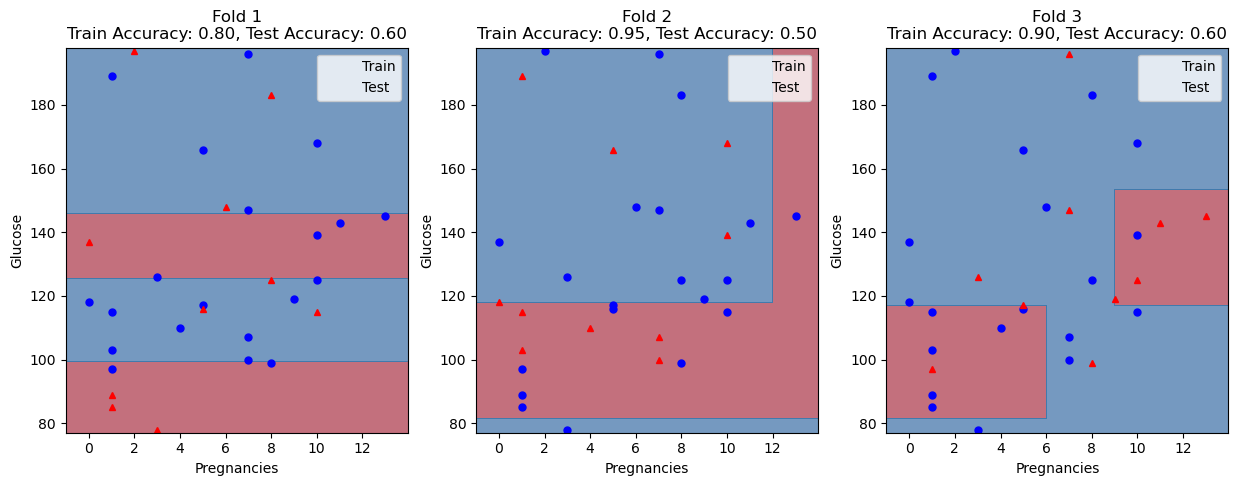

Promedio Train Accuracy: 0.88
Promedio Test Accuracy: 0.57


In [106]:
k = 3
kf = KFold(n_splits=k)

tree_classifier = DecisionTreeClassifier(max_depth=3)

train_accs = []
test_accs = []

plt.figure(figsize=(15, 5))

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    tree_classifier.fit(X_train, y_train)

    train_predictions = tree_classifier.predict(X_train)
    test_predictions = tree_classifier.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = tree_classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.subplot(1, k, fold + 1)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.xlabel("Pregnancies")
    plt.ylabel("Glucose")

    for i in range(len(X_train)):
        x_i = X_train[i]
        plt.plot(x_i[0], x_i[1], 'bo', markersize=5)

    for i in range(len(X_test)):
        x_i = X_test[i]
        plt.plot(x_i[0], x_i[1], 'r^', markersize=5)

    plt.legend([f"Train", f"Test"], loc='upper right')
    plt.title(f"Fold {fold + 1}\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Fold {fold + 1}Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")


Precisión en el conjunto de entrenamiento: 0.875
Precisión en el conjunto de prueba: 0.3333333333333333
Precisión promedio en validación cruzada: 0.6666666666666667


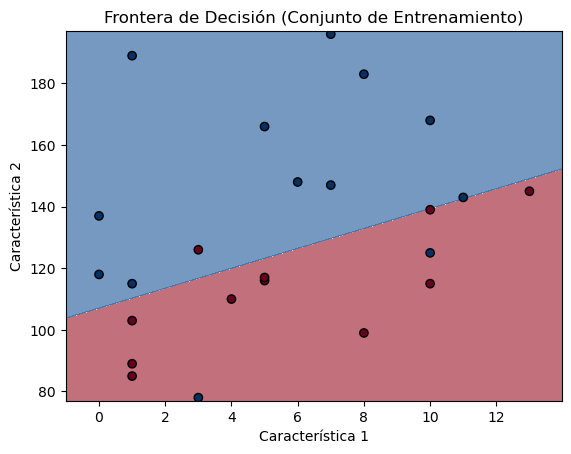

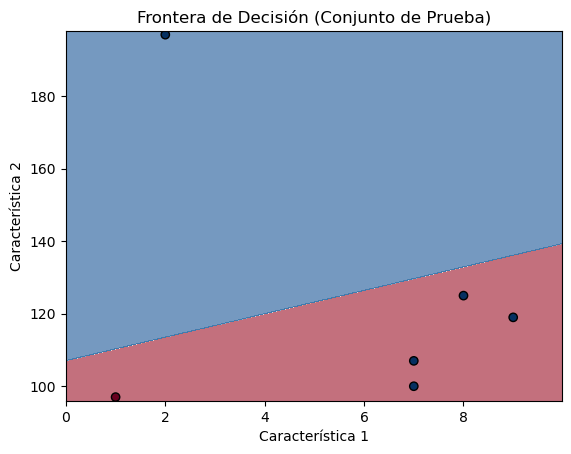

In [107]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# Calcular la precisión en el conjunto de entrenamiento
train_accuracy = logistic_model.score(X_train, y_train)

# Calcular la precisión en el conjunto de prueba
test_accuracy = logistic_model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)

# Realizar validación cruzada para evaluar el modelo de manera más robusta
cv_scores = cross_val_score(logistic_model, X, Y, cv=5)
print("Precisión promedio en validación cruzada:", np.mean(cv_scores))

# Dibujar la frontera de decisión en el conjunto de entrenamiento y prueba
def plot_decision_boundary(X, y, model, title):
    h = .02  # Tamaño de paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.title(title)
    plt.show()

# Dibujar la frontera de decisión en el conjunto de entrenamiento
plot_decision_boundary(X_train, y_train, logistic_model, "Frontera de Decisión (Conjunto de Entrenamiento)")

# Dibujar la frontera de decisión en el conjunto de prueba
plot_decision_boundary(X_test, y_test, logistic_model, "Frontera de Decisión (Conjunto de Prueba)")


<br>
<b></b>
<br>
<i><b>C:</b></i>Crear un modelo de KNN(escalar los datos antes) con sklearn
determinar accuracy en train y test
<br>
<b></b>
<br>

In [108]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar los datos utilizando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de KNN
k = 3  # Número de vecinos
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo en el conjunto de entrenamiento escalado
knn_classifier.fit(X_train_scaled, y_train)

# Predecir las etiquetas en el conjunto de entrenamiento y prueba
train_predictions = knn_classifier.predict(X_train_scaled)
test_predictions = knn_classifier.predict(X_test_scaled)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Precisión en el conjunto de entrenamiento:", train_accuracy)
print("Precisión en el conjunto de prueba:", test_accuracy)


Precisión en el conjunto de entrenamiento: 0.8333333333333334
Precisión en el conjunto de prueba: 0.3333333333333333


# **Punto 2: Usando las 30 primeras muestras del dataset de california housing,  y las columnas housing_median_age, median_income entrada y median_house_value de salida**


<i><b>LINK DE DATOS:</b></i>https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv
<br>
<b></b>
<br>
<i><b>A:</b></i>Crear un modelo de regresión lineal con sklearn
Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar rmse en train y test
<br>
<b></b>
<br>
<i><b>B:</b></i>Crear un modelo de árbol de decisión con sklearn max_depth=3
Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar rmse en train y test
<br>
<b></b>
<br>
<i><b>C:</b></i>Crear un modelo de KNN con sklearn(escalar los datos antes)
<br>
determinar rmse en train y test






In [109]:
df_california = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv')

In [110]:
df_california_30 = df_california.head(30)
X_california = df_california_30[['housing_median_age', 'median_income']].values
Y_california = df_california_30['median_house_value'].values

Fold 1 - Train Accuracy: 0.35, Test Accuracy: 0.00
Fold 2 - Train Accuracy: 0.40, Test Accuracy: 0.00
Fold 3 - Train Accuracy: 0.35, Test Accuracy: 0.00


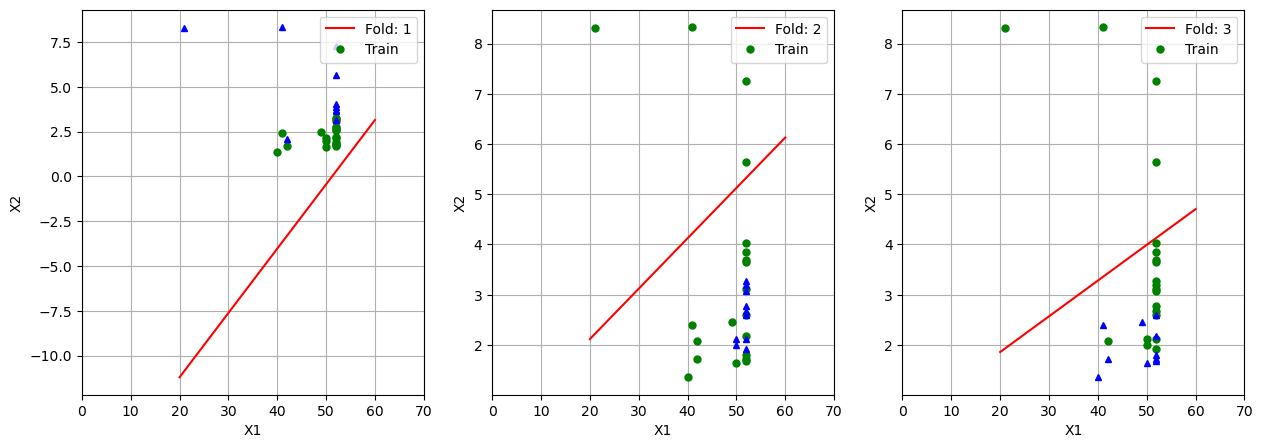

Promedio Train Accuracy: 0.37
Promedio Test Accuracy: 0.00


In [111]:
k = 3
kf = KFold(n_splits=k)

logisticRegr = LogisticRegression()

train_accs = []
test_accs = []
coef = []
intercept = []


plt.figure(figsize=(15, 5))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_california)):
    X_train, X_test = X_california[train_indices], X_california[test_indices]
    y_train, y_test = Y_california[train_indices], Y_california[test_indices]

    logisticRegr.fit(X_train, y_train)

    train_predictions = logisticRegr.predict(X_train)
    test_predictions = logisticRegr.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    w1 = logisticRegr.coef_[0][0]
    w2 = logisticRegr.coef_[0][1]
    b = logisticRegr.intercept_[0]

    x1 = np.linspace(20, 60, 100)
    x2 = -(w1 / w2) * x1 - (b / w2)

    plt.subplot(1, k, fold + 1)
    plt.plot(x1, x2, 'r-', label=f'Fold {fold + 1}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(0, 70)
    plt.legend()
    plt.grid()

    for i in range(len(X_train)):
        x_i = X_train[i]
        plt.plot(x_i[0], x_i[1], 'go', markersize=5)

    for i in range(len(X_test)):
        x_i = X_test[i]
        plt.plot(x_i[0], x_i[1], 'b^', markersize=5)

    plt.legend([f"Fold: {fold + 1}", "Train"], loc='upper right')
    print(f"Fold {fold + 1} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")

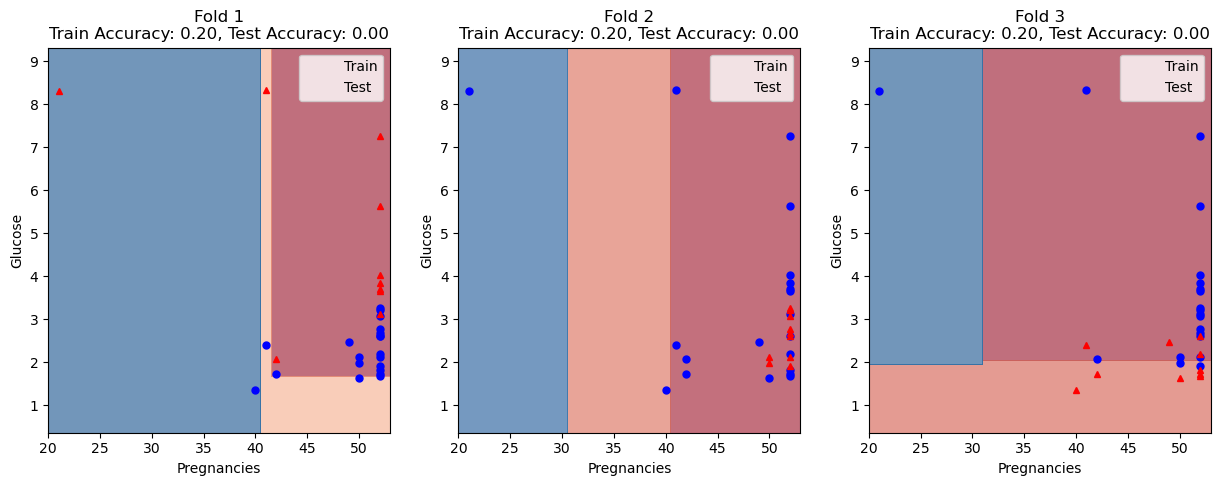

Promedio Train Accuracy: 0.20
Promedio Test Accuracy: 0.00


In [112]:
k = 3
kf = KFold(n_splits=k)

tree_classifier = DecisionTreeClassifier(max_depth=3)

train_accs = []
test_accs = []

plt.figure(figsize=(15, 5))

for fold, (train_indices, test_indices) in enumerate(kf.split(X_california)):
    X_train, X_test = X_california[train_indices], X_california[test_indices]
    y_train, y_test = Y_california[train_indices], Y_california[test_indices]

    tree_classifier.fit(X_train, y_train)

    train_predictions = tree_classifier.predict(X_train)
    test_predictions = tree_classifier.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    x1_min, x1_max = X_california[:, 0].min() - 1, X_california[:, 0].max() + 1
    x2_min, x2_max = X_california[:, 1].min() - 1, X_california[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = tree_classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.subplot(1, k, fold + 1)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.xlabel("Pregnancies")
    plt.ylabel("Glucose")

    for i in range(len(X_train)):
        x_i = X_train[i]
        plt.plot(x_i[0], x_i[1], 'bo', markersize=5)

    for i in range(len(X_test)):
        x_i = X_test[i]
        plt.plot(x_i[0], x_i[1], 'r^', markersize=5)

    plt.legend([f"Train", f"Test"], loc='upper right')
    plt.title(f"Fold {fold + 1}\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

plt.show()

print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")


In [113]:

X_train, X_test, Y_train, Y_test = train_test_split(X_california, Y_california, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_scaled, Y_train)

Y_train_pred = knn_model.predict(X_train_scaled)
Y_test_pred = knn_model.predict(X_test_scaled)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_train:.2f}')
print(f'Precisión en el conjunto de prueba: {accuracy_test:.2f}')

Precisión en el conjunto de entrenamiento: 0.33
Precisión en el conjunto de prueba: 0.00
